# Impact of Flooding on Beef Cattle Herd Size in Queensland and Australian Cattle Prices

### The aim of this analysis was to explore whether :

#### 1) flooding has an impact on the total number of beef cattle in Queensland

Flooding is known to damage and destroy pasture and stock crops, and cause disease among livestock. As well as losing cattle to disease, farmers may need to cull stock to reduce the load on remaining pasture and feed.

#### 2) flooding in Queensland has an impact on saleyard prices of cattle in Australia

As Queensland produced over 44% of all of Australia's beef cattle in 2021 (Meat & Livestock Australia), any major impact on cattle numbers in this region is likely to be reflected in overall Australian market cattle prices. One major indicator of local market prices is the per kg price of yearling cattle at saleyards.

### It was hypothesised that:
#### 1) cattle numbers will reduce in response to flooding due to lack of feed and disease among livestock
#### 2) saleyard prices will increase in response to lower cattle numbers for sale

### It was found that:
#### 1) flooding does negatively impact cattle numbers. 
However, this impact is heavily influenced by cattle numbers prior to the flood. When the cattle herd is of a manageable size, flooding does not have a significant impact. However, when cattle numbers rise beyond those manageable in an adverse weather event, flooding causes a significant decrease in cattle numbers.
#### 2) reduced cattle numbers do result in higher cattle market prices. 
However, as significant decreases in cattle numbers are qualified by cattle numbers before the adverse weather event, only flooding when cattle numbers are high has any significant impact on prices.

### Other findings:

While flooding does have a negative effect on cattle numbers and contributes to increased cattle prices if the impact is significant enough, droughts have a much more pronounced impact on both. Like flooding, the impact of drought appears qualified by the size of the herd immediately prior to the drought.

It may be that there is an "optimal" cattle herd size for Queensland, considering the increasing frequency and severity of flooding and drought events. An optimal herd size may be maintainable through adverse weather events. Not needing to cull large numbers of stock in response to adverse weather events may lessen the stress on the land and farmer, and contribute towards more stable livestock prices.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import hvplot.pandas
import numpy as np
import datetime
from scipy.stats import linregress

In [2]:
# Import cattle counts excerpt created in abs_cattle_totals_2020_transform.ipynb
qld_data = pd.read_csv("data/abs_qld_cattle_counts_excerpt.csv")
qld_data.head()

,Unnamed: 0,Year,Queensland
0,14,1976,11036.0
1,15,1977,10856.0
2,16,1978,10261.0
3,17,1979,9756.0
4,18,1980,9359.0


In [3]:
# Check column names
qld_data.columns.to_list()

['Unnamed: 0', 'Year', 'Queensland']

In [4]:
# Only keep the year and herd size values
qld_cattle_final = qld_data[["Year", "Queensland"]]
qld_cattle_final.head()

,Year,Queensland
0,1976,11036.0
1,1977,10856.0
2,1978,10261.0
3,1979,9756.0
4,1980,9359.0


In [5]:
# Check data types
qld_cattle_final.dtypes

Year            int64
Queensland    float64
dtype: object

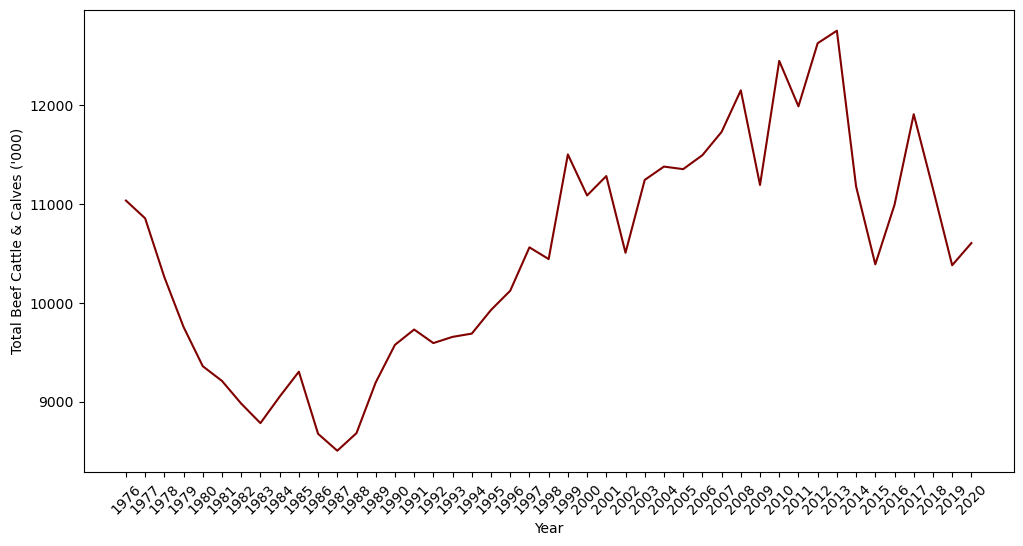

In [6]:
# Plot cattle numbers by year
x_values = qld_cattle_final["Year"]
y_values = qld_cattle_final["Queensland"]
fig = plt.figure(figsize=(12,6))
plt.plot(x_values, y_values, color="maroon")
plt.xticks(np.arange(min(x_values), max(x_values)+1, 1.0), rotation=45)
plt.xlabel("Year")
plt.ylabel("Total Beef Cattle & Calves ('000)")
plt.savefig("visuals/QLD_cattle_base.png")
plt.show()

In [7]:
# Import river dishcarge data created in ingest.ipynb
all_flood_data = pd.read_csv("data/flooddata.csv")
all_flood_data.head()

,date,location,latitude,longitude,temperature_2m_max,temperature_2m_min,temperature_2m_mean,precipitation_sum,precipitation_hours,windspeed_10m_max,et0_fao_evapotranspiration,river_discharge
0,1990-01-01,Brisbane,-27.5,153.0,28.6,18.3,22.5,0.0,0.0,14.1,5.97,33.20
1,1990-01-02,Brisbane,-27.5,153.0,29.3,17.0,22.9,0.0,0.0,13.4,6.23,31.58
2,1990-01-03,Brisbane,-27.5,153.0,30.8,19.3,24.1,0.0,0.0,13.1,6.46,30.41
3,1990-01-04,Brisbane,-27.5,153.0,35.5,18.5,26.0,0.0,0.0,16.8,7.28,29.48
4,1990-01-05,Brisbane,-27.5,153.0,27.4,22.0,24.3,0.0,0.0,19.4,4.71,28.85


In [8]:
# Convert "date" column to datetime
all_flood_data["date"] = all_flood_data["date"].astype("datetime64[ns]")

In [9]:
# Extract year from "date" column
all_flood_data['Year'] = all_flood_data["date"].dt.strftime("%Y")
all_flood_data.head()

,date,location,latitude,longitude,temperature_2m_max,temperature_2m_min,temperature_2m_mean,precipitation_sum,precipitation_hours,windspeed_10m_max,et0_fao_evapotranspiration,river_discharge,Year
0,1990-01-01,Brisbane,-27.5,153.0,28.6,18.3,22.5,0.0,0.0,14.1,5.97,33.20,1990
1,1990-01-02,Brisbane,-27.5,153.0,29.3,17.0,22.9,0.0,0.0,13.4,6.23,31.58,1990
2,1990-01-03,Brisbane,-27.5,153.0,30.8,19.3,24.1,0.0,0.0,13.1,6.46,30.41,1990
3,1990-01-04,Brisbane,-27.5,153.0,35.5,18.5,26.0,0.0,0.0,16.8,7.28,29.48,1990
4,1990-01-05,Brisbane,-27.5,153.0,27.4,22.0,24.3,0.0,0.0,19.4,4.71,28.85,1990


In [10]:
# Calculate average river discharge by year
all_flood_data_yearly = all_flood_data.groupby("Year").mean(numeric_only=True)
all_flood_data_yearly

,latitude,longitude,temperature_2m_max,temperature_2m_min,temperature_2m_mean,precipitation_sum,precipitation_hours,windspeed_10m_max,et0_fao_evapotranspiration,river_discharge
Year,,,,,,,,,,
1990,-23.509667,150.307333,26.281005,17.956256,21.716895,3.076712,3.219178,16.431781,4.095187,268.974950
1991,-23.509667,150.307333,26.769772,18.070502,22.048584,2.079361,2.764384,15.901826,4.088767,623.549315
1992,-23.509667,150.307333,26.498543,18.124044,21.934699,1.805191,2.595628,15.569217,4.119308,35.107650
1993,-23.509667,150.307333,26.522922,18.412511,22.085845,1.189589,2.369863,16.222557,4.083370,12.788301
1994,-23.509667,150.307333,26.638174,17.741918,21.780913,1.182374,2.136986,16.605662,4.306785,20.529178
1995,-23.509667,150.307333,26.746484,18.366484,22.131963,1.754521,2.602740,16.280000,4.167918,37.603845
1996,-23.509667,150.307333,26.628142,18.054098,21.955647,2.273406,3.628415,16.289435,4.152177,62.885209
1997,-23.509667,150.307333,26.328128,18.268128,21.927032,1.884018,2.776256,16.029224,4.000256,186.694584
1998,-23.509667,150.307333,26.673881,19.078174,22.518447,2.413333,3.616438,15.687854,3.867096,223.322959


In [11]:
# Reset the index
all_flood_data_yearly.reset_index(inplace=True)
all_flood_data_yearly.head()

,Year,latitude,longitude,temperature_2m_max,temperature_2m_min,temperature_2m_mean,precipitation_sum,precipitation_hours,windspeed_10m_max,et0_fao_evapotranspiration,river_discharge
0,1990,-23.509667,150.307333,26.281005,17.956256,21.716895,3.076712,3.219178,16.431781,4.095187,268.974950
1,1991,-23.509667,150.307333,26.769772,18.070502,22.048584,2.079361,2.764384,15.901826,4.088767,623.549315
2,1992,-23.509667,150.307333,26.498543,18.124044,21.934699,1.805191,2.595628,15.569217,4.119308,35.107650
3,1993,-23.509667,150.307333,26.522922,18.412511,22.085845,1.189589,2.369863,16.222557,4.083370,12.788301
4,1994,-23.509667,150.307333,26.638174,17.741918,21.780913,1.182374,2.136986,16.605662,4.306785,20.529178


In [12]:
# Keep only the Year and River Discharge values
all_qld_av_discharge = all_flood_data_yearly[["Year", "river_discharge"]]
all_qld_av_discharge

,Year,river_discharge
0,1990,268.974950
1,1991,623.549315
2,1992,35.107650
3,1993,12.788301
4,1994,20.529178
5,1995,37.603845
6,1996,62.885209
7,1997,186.694584
8,1998,223.322959
9,1999,118.103489


In [13]:
# Check data types
all_qld_av_discharge.dtypes

Year                object
river_discharge    float64
dtype: object

In [14]:
# Covert Year values to integer
all_qld_av_discharge=all_qld_av_discharge.apply(pd.to_numeric, errors="coerce")

In [15]:
# Check data frame still looks right
all_qld_av_discharge.head()

,Year,river_discharge
0,1990,268.974950
1,1991,623.549315
2,1992,35.107650
3,1993,12.788301
4,1994,20.529178


In [16]:
# Check data types to make sure conversion worked
all_qld_av_discharge.dtypes

Year                 int64
river_discharge    float64
dtype: object

In [17]:
# Merge the stock number by year and average annual river discharge dataframes 
# based on years included in river discharge dataframe
all_herd_vs_discharge = pd.merge(all_qld_av_discharge, qld_cattle_final, on="Year", how="left" )
all_herd_vs_discharge

,Year,river_discharge,Queensland
0,1990,268.974950,9575.20
1,1991,623.549315,9730.40
2,1992,35.107650,9593.20
3,1993,12.788301,9656.10
4,1994,20.529178,9689.10
5,1995,37.603845,9928.30
6,1996,62.885209,10123.00
7,1997,186.694584,10562.30
8,1998,223.322959,10443.60
9,1999,118.103489,11502.60


In [18]:
# Drop null values
all_herd_vs_discharge.dropna(how="any", inplace=True)
all_herd_vs_discharge

,Year,river_discharge,Queensland
0,1990,268.974950,9575.20
1,1991,623.549315,9730.40
2,1992,35.107650,9593.20
3,1993,12.788301,9656.10
4,1994,20.529178,9689.10
5,1995,37.603845,9928.30
6,1996,62.885209,10123.00
7,1997,186.694584,10562.30
8,1998,223.322959,10443.60
9,1999,118.103489,11502.60


In [19]:
# Rename column
all_herd_vs_discharge.rename(columns={"Queensland": "Herd Size"}, inplace=True)
all_herd_vs_discharge.head()

,Year,river_discharge,Herd Size
0,1990,268.974950,9575.2
1,1991,623.549315,9730.4
2,1992,35.107650,9593.2
3,1993,12.788301,9656.1
4,1994,20.529178,9689.1


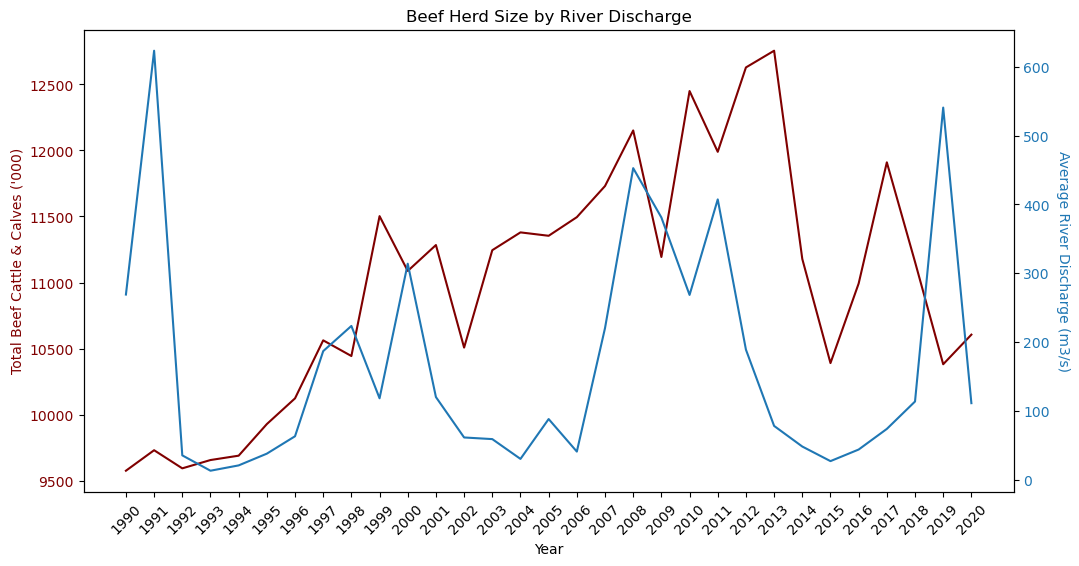

In [20]:
# Plot cattle numbers vs river discharge on the same graph
all_x_values = all_herd_vs_discharge["Year"]
all_y_values_1 = all_herd_vs_discharge["Herd Size"]
all_y_values_2 = all_herd_vs_discharge["river_discharge"]

# Set figure and xtick patameters
fig1, ax1 = plt.subplots(figsize=(12,6))
plt.xticks(np.arange(min(all_x_values), max(all_x_values)+1, 1.0), rotation=45)

# Set x-axis and first y-axis
ax1.set_xlabel("Year")
ax1.set_ylabel("Total Beef Cattle & Calves ('000)", color="maroon")
ax1.plot(all_x_values, all_y_values_1, color="maroon")
ax1.tick_params(axis="y", labelcolor="maroon")

# Set x-axis to be shared by both y-axes
ax2 = ax1.twinx()

# Set second y-axis
ax2.set_ylabel("Average River Discharge (m3/s)", rotation=270, va="bottom", color="tab:blue")
ax2.plot(all_x_values, all_y_values_2, color="tab:blue")
ax2.tick_params(axis="y", labelcolor="tab:blue")

# Set plot title
plt.title("Beef Herd Size by River Discharge")

# Save plot as png
plt.savefig("visuals/herd_by_flood.png")

# Set plot layout and display
fig.tight_layout()
plt.show()


The r-value is: 0.00580141341601623


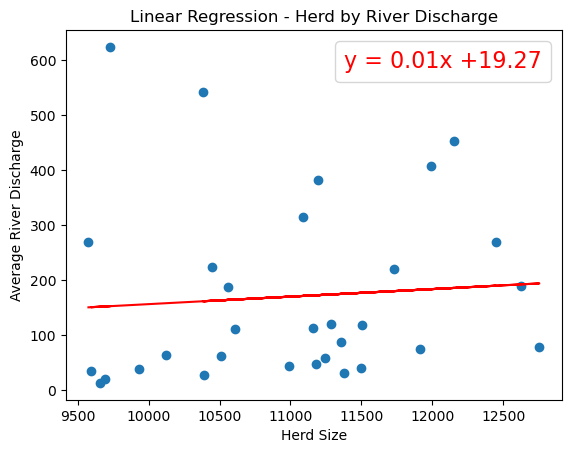

In [21]:
# Calculate correlation coefficient and linear regression of herd size by river discharge, and display
x_figures = all_herd_vs_discharge["Herd Size"]
y_figures = all_herd_vs_discharge["river_discharge"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_figures, y_figures)
regress_values = x_figures * slope + intercept
plt.scatter(x_figures, y_figures)
plt.xlabel("Herd Size")
plt.ylabel("Average River Discharge")
plt.title("Linear Regression - Herd by River Discharge")
plt.plot(x_figures, regress_values, "r-", label=("y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))))
plt.legend(loc="best", handletextpad=0, handlelength=0, labelcolor="red", fontsize=16)
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Pearson's r shows a very weak/non-existent relationship between flooding/drought and herd size. However,  correlation and linear regression analysis aren't suitable here as the impacts of adverse weather events are conditional on herd size before adverse event (i.e. when herd is of manageable size, effects of flooding and drought appear non-existent or unpronounced; however, when herd size increases beyond a manageable level, the impacts of flooding and drought are significant. "Manageable" means the level at which herd does not neet to be reduced in response to disease/loss of feed due to weather events).

In [22]:
# Using original groupby weather dataframe, choose Year and Rain values
all_qld_av_rain = all_flood_data_yearly[["Year", "precipitation_sum"]]
all_qld_av_rain

,Year,precipitation_sum
0,1990,3.076712
1,1991,2.079361
2,1992,1.805191
3,1993,1.189589
4,1994,1.182374
5,1995,1.754521
6,1996,2.273406
7,1997,1.884018
8,1998,2.413333
9,1999,2.432603


In [23]:
# Check data types
all_qld_av_rain.dtypes

Year                  object
precipitation_sum    float64
dtype: object

In [24]:
# Convert Year values to integer
all_qld_av_rain=all_qld_av_rain.apply(pd.to_numeric, errors="coerce")

In [25]:
# Merge the average rain and cattle numbers dataframes,
# based on Year values in average rain dataframe
all_herd_vs_rain = pd.merge(all_qld_av_rain, qld_cattle_final, on="Year", how="left" )
all_herd_vs_rain

,Year,precipitation_sum,Queensland
0,1990,3.076712,9575.20
1,1991,2.079361,9730.40
2,1992,1.805191,9593.20
3,1993,1.189589,9656.10
4,1994,1.182374,9689.10
5,1995,1.754521,9928.30
6,1996,2.273406,10123.00
7,1997,1.884018,10562.30
8,1998,2.413333,10443.60
9,1999,2.432603,11502.60


In [26]:
# Drop null values
all_herd_vs_rain.dropna(how="any", inplace=True)
all_herd_vs_rain

,Year,precipitation_sum,Queensland
0,1990,3.076712,9575.20
1,1991,2.079361,9730.40
2,1992,1.805191,9593.20
3,1993,1.189589,9656.10
4,1994,1.182374,9689.10
5,1995,1.754521,9928.30
6,1996,2.273406,10123.00
7,1997,1.884018,10562.30
8,1998,2.413333,10443.60
9,1999,2.432603,11502.60


In [27]:
# Rename column
all_herd_vs_rain.rename(columns={"Queensland": "Herd Size"}, inplace=True)
all_herd_vs_rain.head()

,Year,precipitation_sum,Herd Size
0,1990,3.076712,9575.2
1,1991,2.079361,9730.4
2,1992,1.805191,9593.2
3,1993,1.189589,9656.1
4,1994,1.182374,9689.1


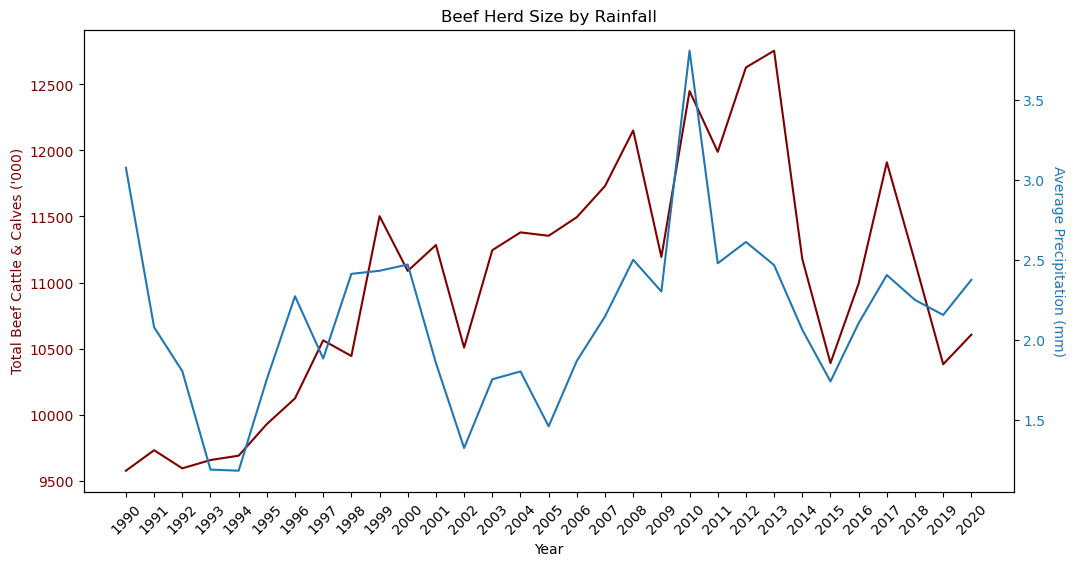

In [28]:
# Plot cattle numbers vs average rain on the same chart
rain_x_values = all_herd_vs_rain["Year"]
rain_y_values_1 = all_herd_vs_rain["Herd Size"]
rain_y_values_2 = all_herd_vs_rain["precipitation_sum"]


# Set figure and xtick patameters
fig1, ax1 = plt.subplots(figsize=(12,6))
plt.xticks(np.arange(min(rain_x_values), max(rain_x_values)+1, 1.0), rotation=45)

# Set x-axis and first y-axis
ax1.set_xlabel("Year")
ax1.set_ylabel("Total Beef Cattle & Calves ('000)", color="maroon")
ax1.plot(rain_x_values, rain_y_values_1, color="maroon")
ax1.tick_params(axis="y", labelcolor="maroon")

# Set x-axis to be shared by both y-axes
ax2 = ax1.twinx()

# Set second y-axis
ax2.set_ylabel("Average Precipitation (mm)", rotation=270, va="bottom", color="tab:blue")
ax2.plot(rain_x_values, rain_y_values_2, color="tab:blue")
ax2.tick_params(axis="y", labelcolor="tab:blue")

# Set plot title
plt.title("Beef Herd Size by Rainfall")

# Save plot as png
plt.savefig("visuals/herd_by_rain.png")

# Set plot layout and display
fig.tight_layout()
plt.show()

The r-value is: 0.21682903612896362


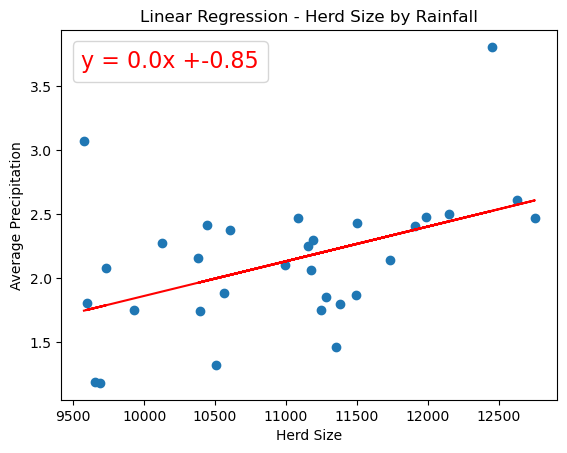

In [29]:
# Calculate correlation coefficient and linear regression of herd size by rainfall, and display
x_figures_rain = all_herd_vs_rain["Herd Size"]
y_figures_rain = all_herd_vs_rain["precipitation_sum"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_figures_rain, y_figures_rain)
regress_values = x_figures_rain * slope + intercept
plt.scatter(x_figures_rain, y_figures_rain)
plt.xlabel("Herd Size")
plt.ylabel("Average Precipitation")
plt.title("Linear Regression - Herd Size by Rainfall")
plt.plot(x_figures_rain, regress_values, "r-", label=("y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))))
plt.legend(loc="best", handletextpad=0, handlelength=0, labelcolor="red", fontsize=16)
print(f"The r-value is: {rvalue**2}")
plt.show()

#### Again, there is a weak correlation between precipitation and herd size. There appears to be a positive correlation between rainfall and herd size. However, the size of the impact is still conditional on starting herd size, with larger starting herd size associated with larger fluctuations in cattle numbers in response to heavy or lack of rainfall. Heavy/low rainfall does not always mean flooding/drought, so it's difficult to draw any conclusions from this particular analysis.

In [30]:
# Import saleyard meat prices file
saleyard_prices = pd.read_csv("Data/abs_meat_prices_saleyard_prices_excerpt.csv")
saleyard_prices

,Unnamed: 0,Yearling,Ox b,Cow c,average d,Lamb e,Mutton g,Pig h
0,NaN,c/kg (cw),c/kg (cw),c/kg (cw),c/kg (cw),c/kg (cw),c/kg (cw),c/kg (cw)
1,1991.0,227,220,175,203,121,11.2,214
2,1992.0,224,228,172,202,131,28.9,196
3,1993.0,238,254,182,219,185,34.3,213
4,1994.0,255,246,184,221,146,34.1,202
5,1995.0,235,218,166,200,192,68.4,213
6,1996.0,181,164,128,154,234,67.7,247
7,1997.0,188,188,134,163,199,75.2,219
8,1998.0,204,206,157,180,178,79,180
9,1999.0,227,217,183,203,204,60.9,216


In [32]:
# Check data types
saleyard_prices.dtypes

Unnamed: 0    float64
Yearling       object
Ox b           object
Cow c          object
average d      object
Lamb e         object
Mutton g       object
Pig h          object
dtype: object

In [33]:
# Drop the first row
saleyard_prices.drop(saleyard_prices.index[0:2],inplace=True)
saleyard_prices.reset_index()
saleyard_prices

,Unnamed: 0,Yearling,Ox b,Cow c,average d,Lamb e,Mutton g,Pig h
2,1992.0,224,228,172,202,131,28.9,196
3,1993.0,238,254,182,219,185,34.3,213
4,1994.0,255,246,184,221,146,34.1,202
5,1995.0,235,218,166,200,192,68.4,213
6,1996.0,181,164,128,154,234,67.7,247
7,1997.0,188,188,134,163,199,75.2,219
8,1998.0,204,206,157,180,178,79,180
9,1999.0,227,217,183,203,204,60.9,216
10,2000.0,261,246,219,237,170,71.8,249
11,2001.0,330,318,289,307,262,146,276


In [34]:
# Check column names
saleyard_prices.columns.to_list()

['Unnamed: 0',
 'Yearling',
 'Ox b',
 'Cow c',
 'average d',
 'Lamb e',
 'Mutton g',
 'Pig h']

In [35]:
# Convert all non-numeric values to numeric
saleyard_prices=saleyard_prices.apply(pd.to_numeric, errors="coerce")

In [36]:
saleyard_prices.dtypes

Unnamed: 0    float64
Yearling        int64
Ox b            int64
Cow c           int64
average d       int64
Lamb e          int64
Mutton g      float64
Pig h           int64
dtype: object

In [37]:
# Convert column with Year values to integer
saleyard_prices["Unnamed: 0"] = saleyard_prices["Unnamed: 0"].astype(int)

In [38]:
# Check data types now
saleyard_prices.dtypes

Unnamed: 0      int64
Yearling        int64
Ox b            int64
Cow c           int64
average d       int64
Lamb e          int64
Mutton g      float64
Pig h           int64
dtype: object

In [39]:
# Check dataframe still looks right
saleyard_prices.head()

,Unnamed: 0,Yearling,Ox b,Cow c,average d,Lamb e,Mutton g,Pig h
2,1992,224,228,172,202,131,28.9,196
3,1993,238,254,182,219,185,34.3,213
4,1994,255,246,184,221,146,34.1,202
5,1995,235,218,166,200,192,68.4,213
6,1996,181,164,128,154,234,67.7,247


In [40]:
# Rename Year column
saleyard_prices = saleyard_prices.rename(columns={"Unnamed: 0": "Year"})
saleyard_prices.head()

,Year,Yearling,Ox b,Cow c,average d,Lamb e,Mutton g,Pig h
2,1992,224,228,172,202,131,28.9,196
3,1993,238,254,182,219,185,34.3,213
4,1994,255,246,184,221,146,34.1,202
5,1995,235,218,166,200,192,68.4,213
6,1996,181,164,128,154,234,67.7,247


In [41]:
# Keep only year and yearling prices columns
beef_prices = saleyard_prices[["Year", "Yearling"]]
beef_prices

,Year,Yearling
2,1992,224
3,1993,238
4,1994,255
5,1995,235
6,1996,181
7,1997,188
8,1998,204
9,1999,227
10,2000,261
11,2001,330


In [42]:
# Merge the yearling prices and cattle numbers dataframes,
# based on the year values in the yearling prices dataframe
herd_vs_price = pd.merge(beef_prices, qld_cattle_final, on="Year", how="left")
herd_vs_price

,Year,Yearling,Queensland
0,1992,224,9593.20
1,1993,238,9656.10
2,1994,255,9689.10
3,1995,235,9928.30
4,1996,181,10123.00
5,1997,188,10562.30
6,1998,204,10443.60
7,1999,227,11502.60
8,2000,261,11087.60
9,2001,330,11283.80


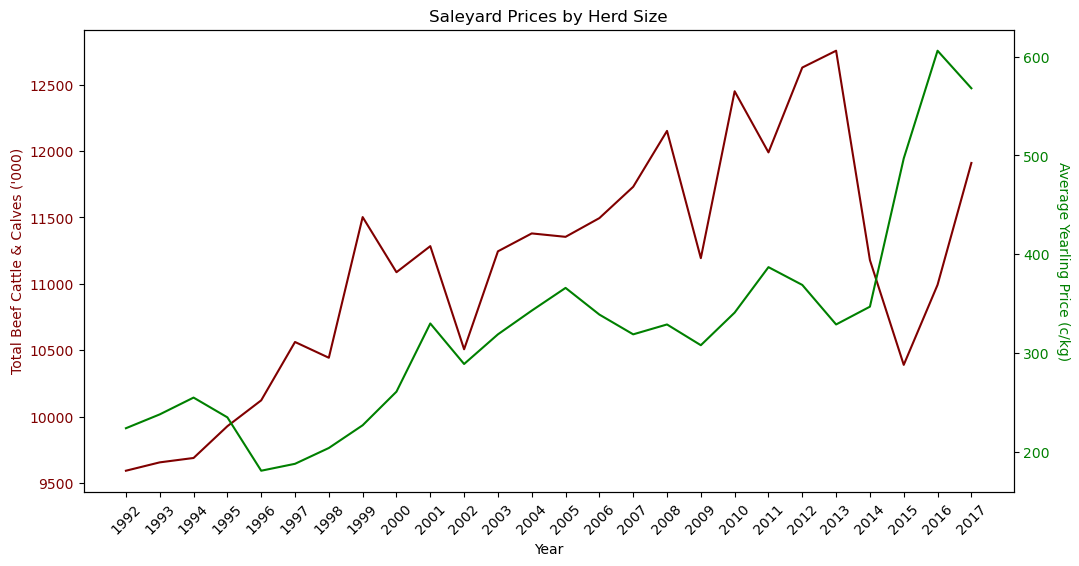

In [43]:
# Plot cattle numbers vs average rain on the same chart
price_x_values = herd_vs_price["Year"]
price_y_values_1 = herd_vs_price["Queensland"]
price_y_values_2 = herd_vs_price["Yearling"]

# Set figure and xtick patameters
fig1, ax1 = plt.subplots(figsize=(12,6))
plt.xticks(np.arange(min(price_x_values), max(price_x_values)+1, 1.0), rotation=45)

# Set x-axis and first y-axis
ax1.set_xlabel("Year")
ax1.set_ylabel("Total Beef Cattle & Calves ('000)", color="maroon")
ax1.plot(price_x_values, price_y_values_1, color="maroon")
ax1.tick_params(axis="y", labelcolor="maroon")

# Set x-axis to be shared by both y-axes
ax2 = ax1.twinx()

# Set second y-axis
ax2.set_ylabel("Average Yearling Price (c/kg)", rotation=270, va="bottom", color="green")
ax2.plot(price_x_values, price_y_values_2, color="green")
ax2.tick_params(axis="y", labelcolor="green")

# Set plot title
plt.title("Saleyard Prices by Herd Size")

# Save plot as png
plt.savefig("visuals/prices_by_herd.png")

# Set plot layout and display
fig.tight_layout()
plt.show()

The r-value is: 0.16717525017986443


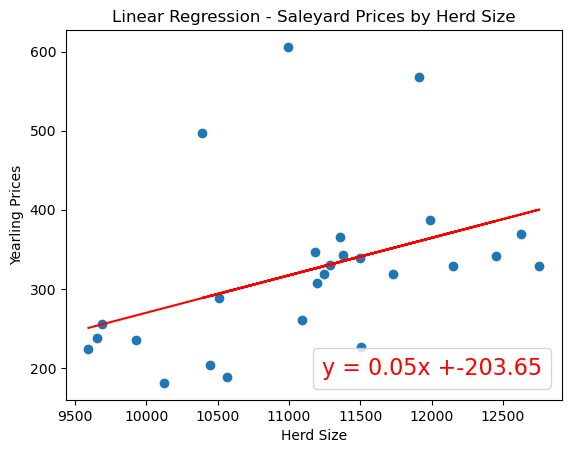

In [44]:
# Calculate correlation coefficient and linear regression of prices by herd size, and display
x_figures_prices = herd_vs_price["Queensland"]
y_figures_prices = herd_vs_price["Yearling"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_figures_prices, y_figures_prices)
regress_values = x_figures_prices * slope + intercept
plt.scatter(x_figures_prices, y_figures_prices)
plt.xlabel("Herd Size")
plt.ylabel("Yearling Prices")
plt.title("Linear Regression - Saleyard Prices by Herd Size")
plt.plot(x_figures_prices, regress_values, "r-", label=("y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))))
plt.legend(loc="best", handletextpad=0, handlelength=0, labelcolor="red", fontsize=16)
print(f"The r-value is: {rvalue**2}")
plt.show()

#### There is a weak positive correlation between herd size and saleyard prices. While prices appear to increase in tandem with herd size, this is probably due to the fact that prices generally increase over time (once prices increase, they also don't tend to decrease). The size of the impact of decerasing cattle numbers of prices appears to be influenced by the size of the drop relative to current herd size. Again, when cattle numbers are low, there isn't much of an impact of a decrease in numbers on prices. However, when cattle numbers are high, the drop is more severe, and prices increase significantly in response.

In [45]:
# Merge the yearling prices and river discharge dataframes,
# based on teh year values in the yearling prices dataframe
prices_vs_flood = pd.merge(beef_prices, all_qld_av_discharge, on="Year", how="left")
prices_vs_flood

,Year,Yearling,river_discharge
0,1992,224,35.107650
1,1993,238,12.788301
2,1994,255,20.529178
3,1995,235,37.603845
4,1996,181,62.885209
5,1997,188,186.694584
6,1998,204,223.322959
7,1999,227,118.103489
8,2000,261,313.852177
9,2001,330,119.901553


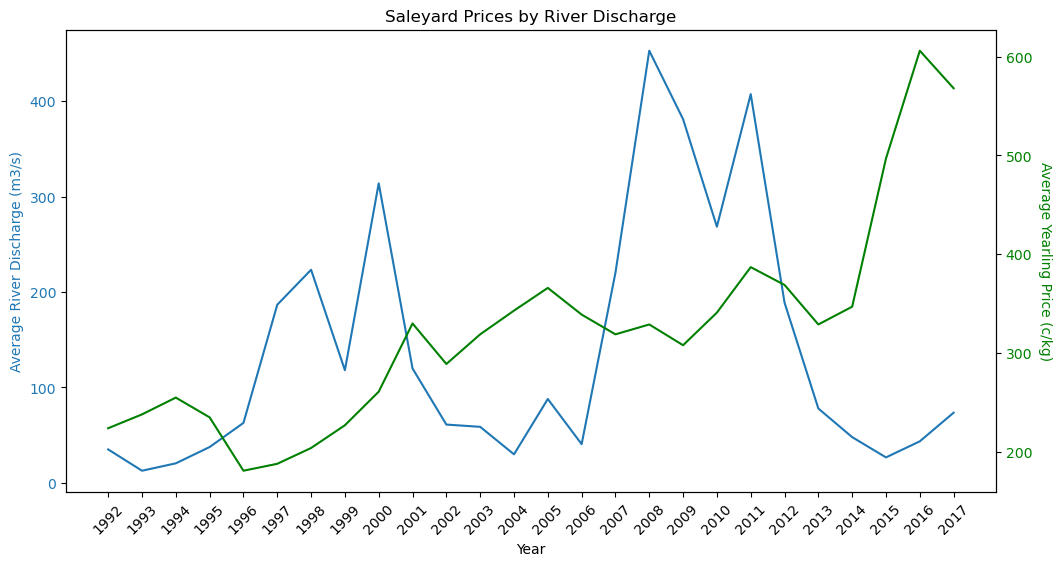

In [46]:
# Plot cattle numbers vs average rain on the same chart
price_flood_x_values = prices_vs_flood["Year"]
price_flood_y_values_1 = prices_vs_flood["river_discharge"]
price_flood_y_values_2 = prices_vs_flood["Yearling"]

# Set figure and xtick patameters
fig1, ax1 = plt.subplots(figsize=(12,6))
plt.xticks(np.arange(min(price_flood_x_values), max(price_flood_x_values)+1, 1.0), rotation=45)

# Set x-axis and first y-axis
ax1.set_xlabel("Year")
ax1.set_ylabel("Average River Discharge (m3/s)", color="tab:blue")
ax1.plot(price_flood_x_values, price_flood_y_values_1, color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")

# Set x-axis to be shared by both y-axes
ax2 = ax1.twinx()

# Set second y-axis
ax2.set_ylabel("Average Yearling Price (c/kg)", rotation=270, va="bottom", color="green")
ax2.plot(price_flood_x_values, price_flood_y_values_2, color="green")
ax2.tick_params(axis="y", labelcolor="green")

# Set plot title
plt.title("Saleyard Prices by River Discharge")

# Save plot as png
plt.savefig("visuals/prices_by_flood.png")

# Set plot layout and display
fig.tight_layout()
plt.show()

The r-value is: 0.005293840965346384


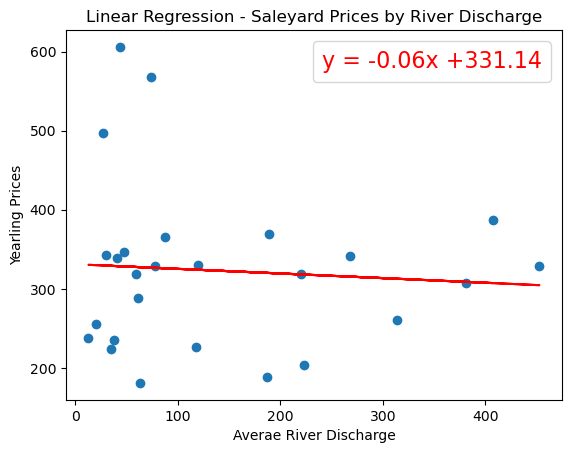

In [47]:
# Calculate correlation coefficient and linear regression of prices by river dicharge, and display
x_figures_prices_flood = prices_vs_flood["river_discharge"]
y_figures_prices_flood = prices_vs_flood["Yearling"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_figures_prices_flood, y_figures_prices_flood)
regress_values = x_figures_prices_flood * slope + intercept
plt.scatter(x_figures_prices_flood, y_figures_prices_flood)
plt.xlabel("Averae River Discharge")
plt.ylabel("Yearling Prices")
plt.title("Linear Regression - Saleyard Prices by River Discharge")
plt.plot(x_figures_prices_flood, regress_values, "r-", label=("y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))))
plt.legend(loc="best", handletextpad=0, handlelength=0, labelcolor="red", fontsize=16)
print(f"The r-value is: {rvalue**2}")
plt.show()

#### There is a non-existent correlation between flooding and saleyard prices. The lack of a correlation is directly related to the fact that prices are affected by large drops in stock numbers, which are only apparent when flooding/droughts happen during times of high starting cattle numbers.